# Import libraries and dataset

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report

## Extract features and labels from datasets

In [2]:
iris = load_iris()

iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
#Labels
col_names = iris.feature_names

col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#Labels
flowers = iris.target_names
flowers

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#Features
df = pd.DataFrame( iris.data , columns = col_names )

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Find a way to relate the target (numerical values) with the target names (string values).

In [6]:
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['flower name'] = df['target'].apply( lambda x : flowers[x] )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
#Seperate all the setosa, versicolor
df0 = df[:50] #setosa
df1 = df[50:100] #versicolor
df2 = df[100:] #virginica

## Sepal length vs Sepal Width

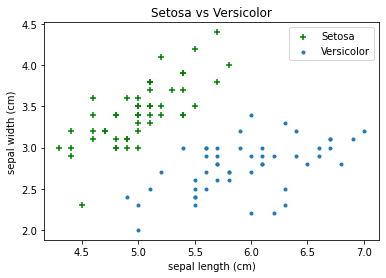

In [9]:
plt.xlabel( col_names[0] )
plt.ylabel( col_names[1] )
plt.title( 'Setosa vs Versicolor' )
plt.scatter( df0[col_names[0]] , df0[col_names[1]] , color = 'green', marker = '+')
plt.scatter( df1[col_names[0]] , df1[col_names[1]] , marker = '.')

plt.legend(["Setosa" , "Versicolor"])

## Pedal length vs Pedal Width

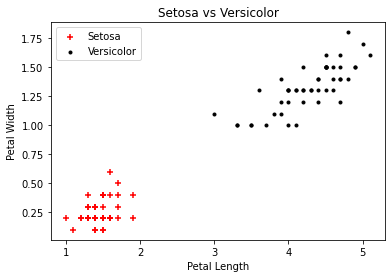

In [10]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title( 'Setosa vs Versicolor' )
plt.scatter( df0[col_names[2]] , df0[col_names[3]] , color = 'red', marker = '+')
plt.scatter( df1[col_names[2]] , df1[col_names[3]] , color = 'black', marker = '.')
plt.legend(["Setosa" , "Versicolor"])

## Train and Test Data

In [11]:
X = df.drop( ['target' , 'flower name'] , axis = 'columns' )
y = df.target

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2 , random_state = 1 )

## Create Classifier

In [12]:
knn = KNeighborsClassifier( )

In [13]:
knn.fit( X_train, y_train )

KNeighborsClassifier()

In [14]:
knn.score(X_test,y_test)

1.0

## Confusion matrix and Classification report

In [15]:
y_pred = knn.predict( X_test )
print( classification_report( y_test , y_pred ) )
cm = confusion_matrix( y_test, y_pred )
print( cm )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Text(33.0, 0.5, 'Truth')

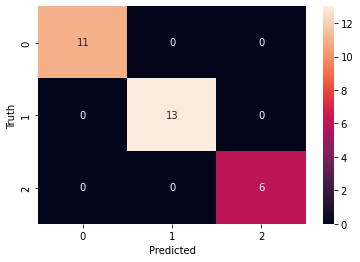

In [16]:
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')